# Predicting heart disease using machine learning classification

This project uses the CRISP-DM model:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

## 1. Business Understanding
### Objective
> Predict whether or not a patient has heart disease based on clinical parameters about the patient.

#### Success Criteria
> We'd like to reach 95% accuracy at predicting whether or not a patient has heart disease, based on various clinical parameters.

## 2. Data Understanding
### Data Collection
The original data came from [the Cleveland data from the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease). It was originally collected at the Cleveland Clinic Foundation by Robert Detrano, M.D., Ph.D.

The .csv file used in this project is a processed version of the above data and came from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

### Data Description
to look into:
* data volume/shape
* any missing data?
* data types
* data dimensions/ranges

**Feature information** (as provided with the original data at the UCI Machine Learning Repository):

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
     * Value 1: typical angina
     * Value 2: atypical angina
     * Value 3: non-anginal pain
     * Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the        hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
* restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 
    * 3 = normal
    * 6 = fixed defect
    * 7 = reversable defect
* num: diagnosis of heart disease (angiographic disease status)
     * Value 0: < 50% diameter narrowing
     * Value 1: > 50% diameter narrowing

In [1]:
# project imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**data volume/shape**

In [2]:
df_data = pd.read_csv("data/heart-disease.csv")
df_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df_data.shape

(303, 14)

The dataset consists of 303 entries (rows) with 14 columns.

**any missing data?**

In [4]:
df_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The data doesn't contain any missing data. (Hurray! No need to deal with missing data.)

**data types**

In [5]:
df_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

All but one of the columns contain integers, one column contains a float.

We could do this in one go with `info()`, which might make the notebook a bit easier to read.

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- **data volume/shape:** The dataset consists of 303 entries (rows) with 14 columns.
- **any missing data?** There's no missing data
- **data types:** All but one of the columns contain integers, one column contains a float.

**data dimensions/ranges**

In [7]:
df_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Data Exploration

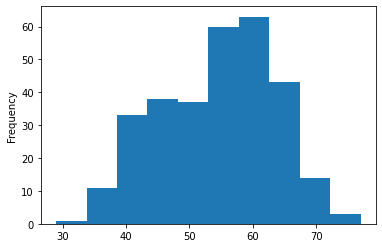

In [9]:
df_data['age'].plot(kind='hist');

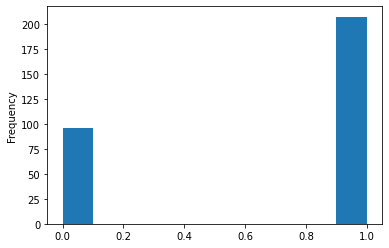

In [10]:
df_data['sex'].plot(kind='hist');

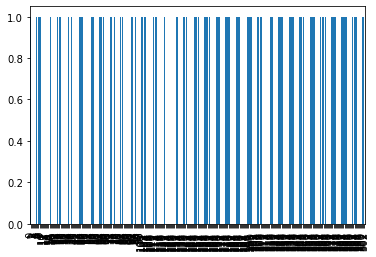

In [11]:
df_data['sex'].plot(kind='bar');

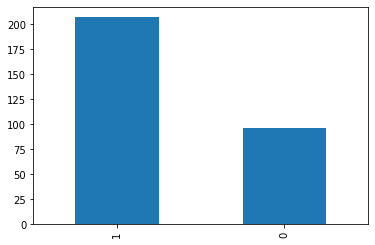

In [12]:
df_data['sex'].value_counts().plot(kind='bar');

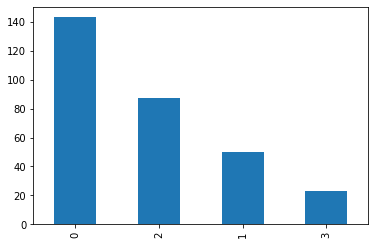

In [13]:
df_data['cp'].value_counts().plot(kind='bar');

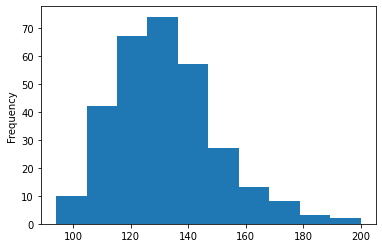

In [14]:
df_data['trestbps'].plot(kind='hist');

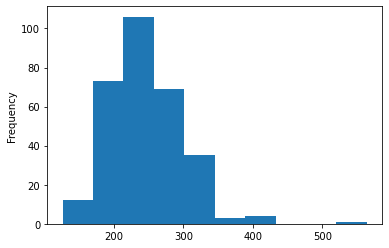

In [15]:
df_data['chol'].plot(kind='hist');

Maybe it's more useful to colour these based on heart disease or not (the target value) already.

**categorical values**
- sex
- cp
- fbs
- restecg
- exang
- slope
- ca
- thal

In [16]:
pd.crosstab(df_data['target'], df_data['sex'])

sex,0,1
target,,
0,24,114
1,72,93


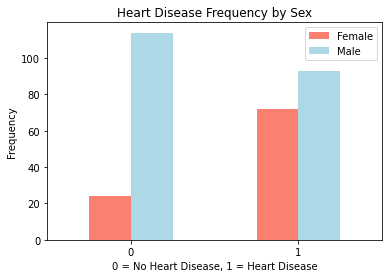

In [36]:
pd.crosstab(df_data['target'], df_data['sex']).plot(kind='bar', 
                                                    color=['Salmon', 'Lightblue'])
plt.title('Heart Disease Frequency by Sex')
plt.ylabel('Frequency')
plt.xlabel('0 = No Heart Disease, 1 = Heart Disease')
plt.xticks(rotation = 0)
plt.legend(['Female', 'Male'])

plt.show()

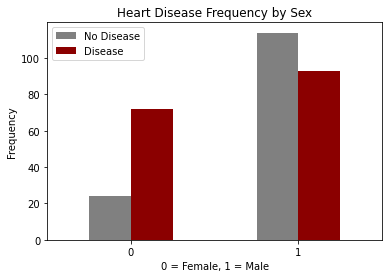

In [56]:
pd.crosstab(df_data['sex'], df_data['target']).plot(kind='bar', 
                                                    color=['Grey', 'Darkred'])
plt.title('Heart Disease Frequency by Sex')
plt.ylabel('Frequency')
plt.xlabel('0 = Female, 1 = Male')
plt.xticks(rotation = 0)
plt.legend(["No Disease", "Disease"])

plt.show()

In [44]:
# likely to re-use this colour scheme a lot, so let's save it somewhere
redgrey_colorscheme = ['Grey', 'Darkred']

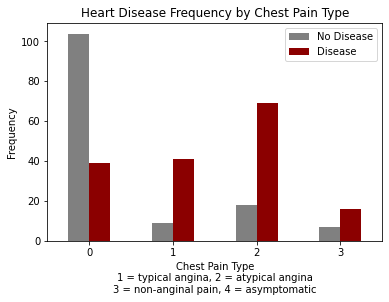

In [45]:
pd.crosstab(df_data['cp'], df_data['target']).plot(kind="bar",
                                                   color=redgrey_colorscheme)
plt.title("Heart Disease Frequency by Chest Pain Type")
plt.xlabel("Chest Pain Type\n"+
           "1 = typical angina, 2 = atypical angina\n"+
           "3 = non-anginal pain, 4 = asymptomatic")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

plt.show()

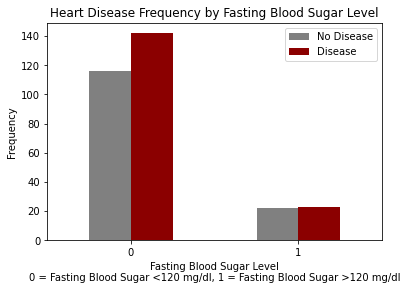

In [60]:
pd.crosstab(df_data['fbs'], df_data['target']).plot(kind="bar",
                                                    color=redgrey_colorscheme)
plt.title("Heart Disease Frequency by Fasting Blood Sugar Level")
plt.xlabel("Fasting Blood Sugar Level\n"+
           "0 = Fasting Blood Sugar <120 mg/dl, 1 = Fasting Blood Sugar >120 mg/dl")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

plt.show()

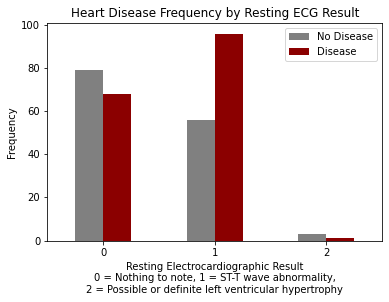

In [76]:
pd.crosstab(df_data['restecg'], df_data['target']).plot(kind="bar",
                                                        color=redgrey_colorscheme)
plt.title("Heart Disease Frequency by Resting ECG Result")
plt.xlabel("Resting Electrocardiographic Result\n"+
           "0 = Nothing to note, 1 = ST-T wave abnormality,\n"+
           "2 = Possible or definite left ventricular hypertrophy")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

plt.show()

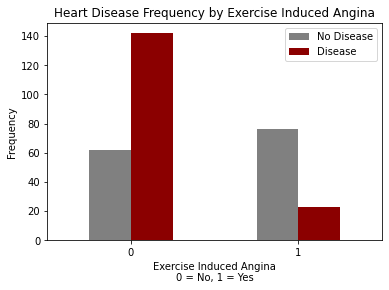

In [59]:
pd.crosstab(df_data['exang'], df_data['target']).plot(kind="bar",
                                                    color=redgrey_colorscheme)
plt.title("Heart Disease Frequency by Exercise Induced Angina")
plt.xlabel("Exercise Induced Angina\n"+
           "0 = No, 1 = Yes")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

plt.show()

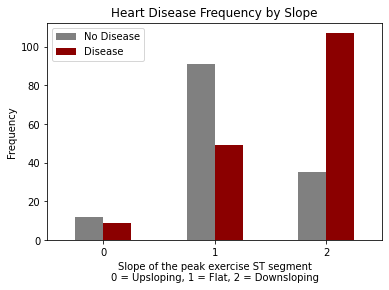

In [49]:
pd.crosstab(df_data['slope'], df_data['target']).plot(kind="bar",
                                                      color=redgrey_colorscheme)
plt.title("Heart Disease Frequency by Slope")
plt.xlabel("Slope of the peak exercise ST segment\n"+
           "0 = Upsloping, 1 = Flat, 2 = Downsloping")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

plt.show()

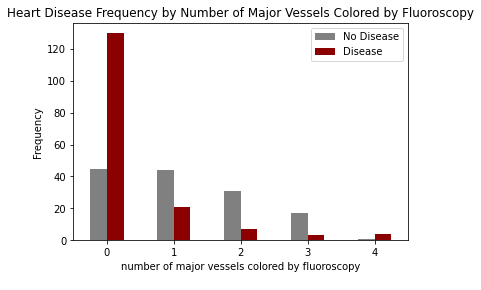

In [55]:
pd.crosstab(df_data['ca'], df_data['target']).plot(kind="bar",
                                                   color=redgrey_colorscheme)
plt.title("Heart Disease Frequency by Number of Major Vessels Colored by Fluoroscopy")
plt.xlabel("number of major vessels colored by fluoroscopy\n")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

plt.show()

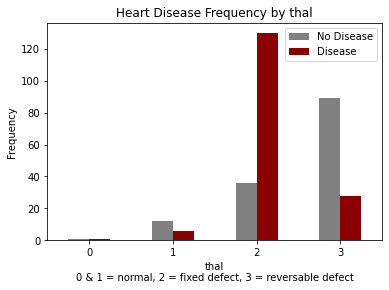

In [53]:
pd.crosstab(df_data['thal'], df_data['target']).plot(kind="bar",
                                                      color=redgrey_colorscheme)
plt.title("Heart Disease Frequency by thal")
plt.xlabel("thal\n"+
           "0 & 1 = normal, 2 = fixed defect, 3 = reversable defect")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

plt.show()

**numeric features**
- age
- trestbps
- chol
- thalach
- oldpeak

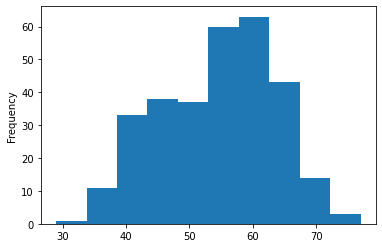

In [67]:
df_data['age'].plot(kind='hist');

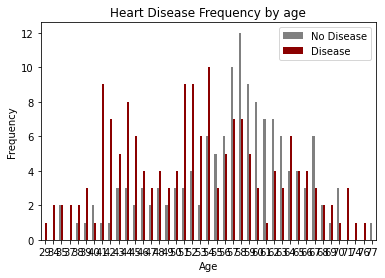

In [82]:
pd.crosstab(df_data['age'], df_data['target']).plot(kind="bar",
                                                    color=redgrey_colorscheme)
plt.title("Heart Disease Frequency by age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

plt.show()

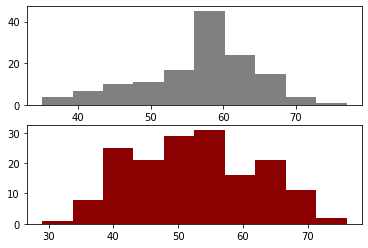

In [89]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.hist(df_data['age'][df_data['target'] == 0], color = 'Grey')
ax2.hist(df_data['age'][df_data['target'] == 1], color = 'Darkred')
plt.show()

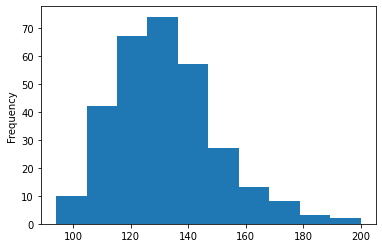

In [84]:
df_data['trestbps'].plot(kind='hist');

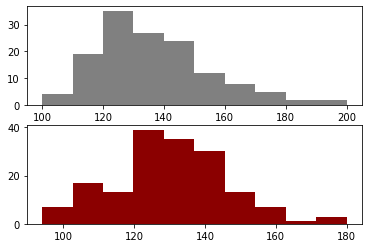

In [85]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.hist(df_data['trestbps'][df_data['target'] == 0], color = 'Grey')
ax2.hist(df_data['trestbps'][df_data['target'] == 1], color = 'Darkred')
plt.show()

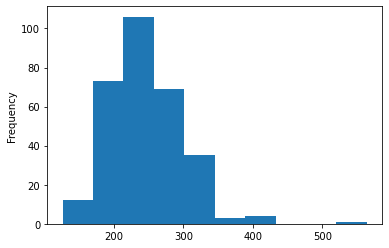

In [70]:
df_data['chol'].plot(kind='hist');

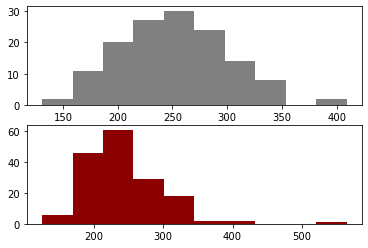

In [86]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.hist(df_data['chol'][df_data['target'] == 0], color = 'Grey')
ax2.hist(df_data['chol'][df_data['target'] == 1], color = 'Darkred')
plt.show()

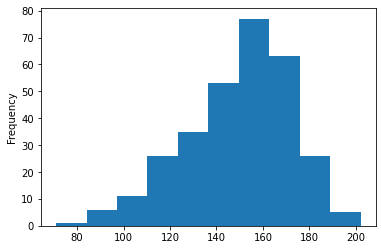

In [77]:
df_data['thalach'].plot(kind='hist');

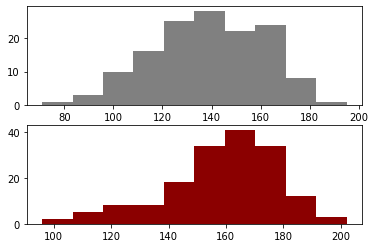

In [87]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.hist(df_data['thalach'][df_data['target'] == 0], color = 'Grey')
ax2.hist(df_data['thalach'][df_data['target'] == 1], color = 'Darkred')
plt.show()

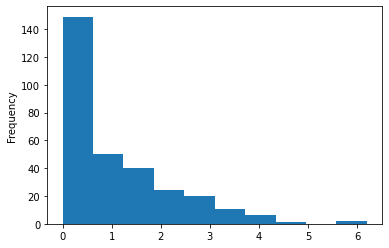

In [74]:
df_data['oldpeak'].plot(kind='hist');

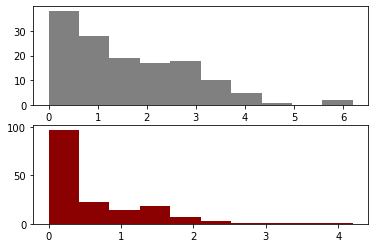

In [88]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.hist(df_data['oldpeak'][df_data['target'] == 0], color = 'Grey')
ax2.hist(df_data['oldpeak'][df_data['target'] == 1], color = 'Darkred')
plt.show()